In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
print(x_train[1:].shape)

(11609, 8)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [14]:
# m=tf.keras.losses.MeanSquaredError()  # 用框架提供的对象
mse = tf.keras.losses.MeanSquaredError()
loss = mse([0., 0., 1., 1.], [1., 1., 1., 0.])
loss # loss: 0.75

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [7]:
# 自定义损失函数
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [8]:
customized_mse(np.array([0., 0., 1., 1.]), np.array([1., 1., 1., 0.]))

<tf.Tensor: shape=(), dtype=float64, numpy=0.75>

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()
model.compile(loss=customized_mse, # 自定义的损失函数
              optimizer="sgd",
              metrics=["mean_squared_error"])  # 算子也可以用，这里是为了验证自定义损失是否正确
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 4s 4ms/step - loss: 3.8679 - mean_squared_error: 3.8679 - val_loss: 0.7471 - val_mean_squared_error: 0.7471
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 22.2735 - mean_squared_error: 22.2735 - val_loss: 11.1003 - val_mean_squared_error: 11.1003
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 2.8975 - mean_squared_error: 2.8975 - val_loss: 27.0339 - val_mean_squared_error: 27.0339
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 1.8752 - mean_squared_error: 1.8752 - val_loss: 0.6986 - val_mean_squared_error: 0.6986
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0690 - mean_squared_error: 1.0690 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5218 - mean_squared_error: 0.5218 - val_loss: 0.4259 - val_mean_squared_error: 0.4259
Epoch 7/100
363/

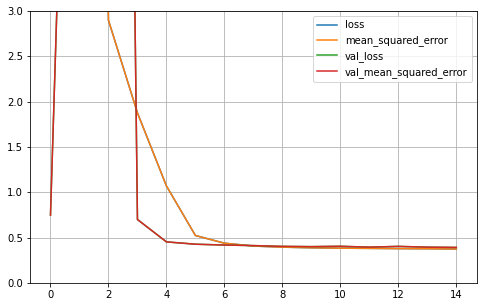

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3896338939666748, 0.3896338939666748]

# 一些验证

In [15]:
y_true = np.random.randint(0, 2, size=(2, 3))
y_pred = np.random.random(size=(2, 3))
print(y_true)
print(y_pred)
loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
loss

[[1 0 0]
 [1 1 1]]
[[0.47524646 0.83148011 0.05933266]
 [0.38158016 0.68345857 0.42781682]]


<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.32341527, 0.27001172])>

In [16]:
customized_mse(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.2967134985471957>

In [18]:
(np.square(1-0.38158016 )+ np.square(1-0.68345857)+ np.square(1-0.42781682))/3

0.270011722295661

In [20]:
(0.32341527 + 0.27001172)/2

0.296713495